# data from project 2

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
import pytz
import numpy as np
import requests
import datetime as dt
import time 
from datetime import datetime
import datetime
from pandas.plotting import register_matplotlib_converters
import scipy.stats as ss

In [31]:
USERNAME ='OOIAPI-XB0026T6O2QKW0'
TOKEN= '11PASC6B78F'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [32]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600 #Coordinated Universal Time is 8 hours ahead of Pacific Time

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

In [33]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-05-05T00:31:20.712Z&endDT=2019-05-05T00:31:20.712Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-05-05T04:33:58.629Z&endDT=2019-05-05T04:33:58.629Z&limit=1000']


In [34]:
#OSSM=Oregon Shelf Surface Mooring
#OOSM=Oregon Offshore Surface Mooring
#Storing vlaues for velocity, precipitation, and time
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

Oregon Shelf Surface Mooring - Surface Buoy


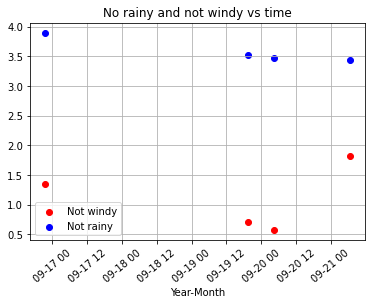

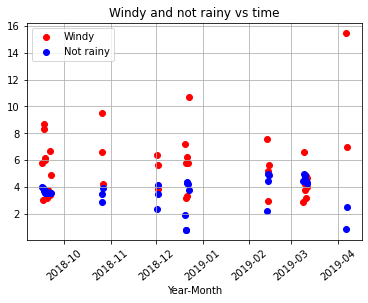

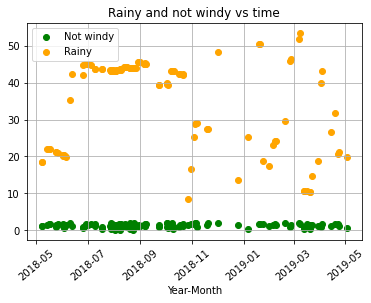

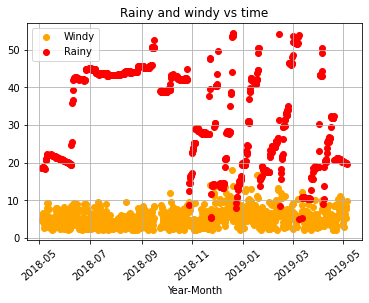

Oregon Offshore Surface Mooring - Surface Buoy


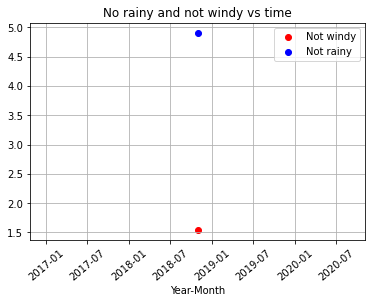

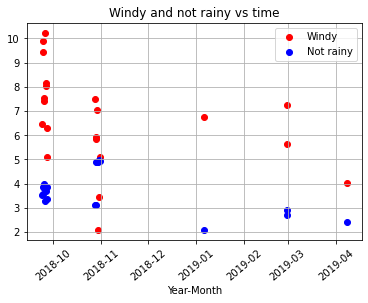

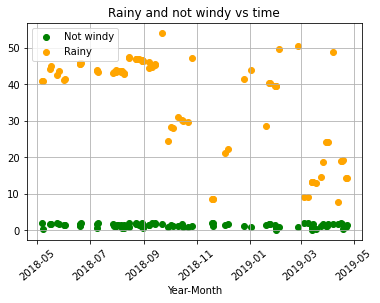

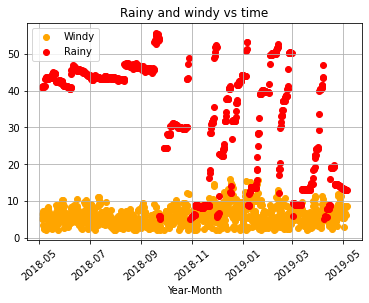

In [62]:
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    if i == 0:
        print("Oregon Shelf Surface Mooring - Surface Buoy")
    elif i==1:
        print("Oregon Offshore Surface Mooring - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        #resultant velocity
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
          
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: No rainy and not windy
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: Windy and not rainy
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rainy and not windy
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rainy and Windy
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: No rainy and not windy
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: Windy and not rainy
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rainy and not windy
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rainy and Windy
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
    # not windy not rainy vs time
    plt.scatter(time1,velocity1,color = 'red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('No rainy and not windy vs time')
    plt.grid(True)
    plt.show()
    
    #1 not rainy and windy vs time
    plt.scatter(time2,velocity2,color = 'red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Windy and not rainy vs time')
    plt.grid(True)
    plt.show()
    
    #3 Rainy and not windy vs time
    plt.scatter(time3,velocity3,color = 'green',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'orange',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and not windy vs time')
    plt.grid(True)
    plt.show()
    
    #4 rainy and windy vs time
    plt.scatter(time4,velocity4,color = 'orange', label='Windy')
    plt.scatter(time4,precipitation4,color = 'red',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and windy vs time')
    plt.grid(True)
    plt.show()
    
            

## Oregon Shelf
#### 1 no rain & no wind  - Sep 17, 2018
#### 2 Wind & no rain     -  early April 2019
#### 3 Rain & no wind     -  early March 2019
#### 4 Rain & wind           - March 2019

## Oregon Offshore
#### 1 no rain & no wind  - Nov 2018
#### 2 Wind & no rain       - end of Feb 2019
#### 3 Rain & no wind       - Sep 2018
#### 4 Rain & wind           - Feb 2019

========================================================================================================

# Part 1) Wind and Rain Noise
### import obspy

In [1]:
import obspy
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

%matplotlib inline


## Oregon Shelf Cabled

### 1.1 No Rain & No Wind (Oregon Shelf)

In [46]:
data_url_1 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
#localFileName = '../data/merged_hydrophone.mseed'

st1 = read(data_url_1)
st1[0].stats


         network: OO
         station: HYVM1
        location: 
         channel: YDH
       starttime: 2017-10-06T20:00:00.000015Z
         endtime: 2017-10-06T20:04:59.997984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199871
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6444, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 26394624})

In [47]:
fs1 = st1[0].stats.sampling_rate
print(fs1)

64000.0


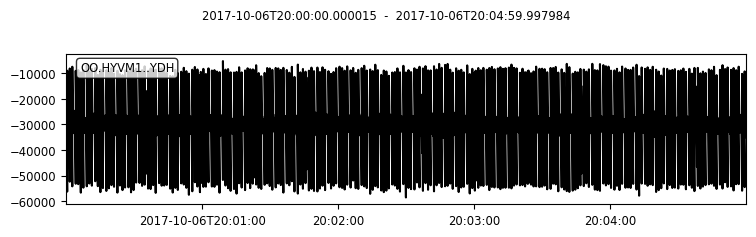

In [48]:
st1[0].plot()

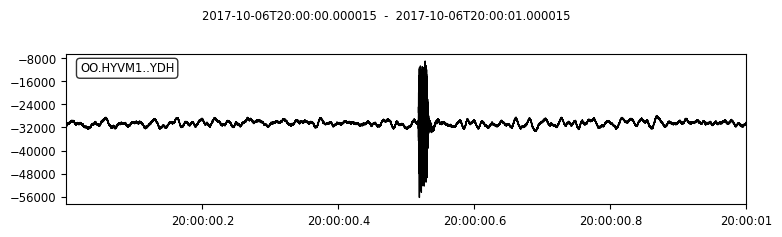

In [49]:
# slicing time
t_start1 = st1[0].stats.starttime 
t_end1 = st1[0].stats.starttime + 1  # one sec
sliced1 = st1.slice(t_start1, t_end1)
sliced1.plot()

(0.0, 15000.0)

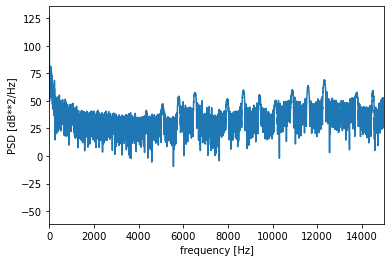

In [50]:
from scipy.fftpack import fft
x1 = (sliced1[0].data)*np.hanning(len(sliced1[0].data))
xfft1 = 2*np.square(fft(x1,64000))/(len(x1)*fs1) # divie by sec 
fre1 = np.linspace(1,fs1,64000)
data_db1 = 10*np.log10(np.abs(xfft1))+169-128.9
plt.plot(fre1[0:32000], data_db1[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

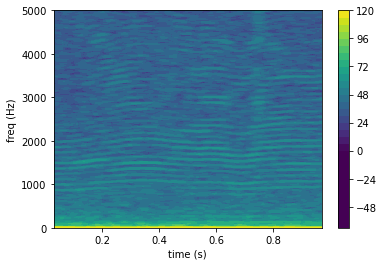

In [54]:
# Plot Spectrogram 
t_start1 = st1[0].stats.starttime +1
t_end1 = st1[0].stats.starttime + 2
sliced1 = st1.slice(t_start1, t_end1)

npts1 = len(sliced1[0])
end1 = npts1 / fs1
nfft1 = int(fs1/16)  # number of fft points of each bin
print(nfft1)
per_lap1 = 0.90      # percentage of overlap
nlap1 = int(nfft1 * float(per_lap1))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram1, freq1, time1 = mlab.specgram(sliced1[0].data,NFFT = nfft1,Fs = fs1,noverlap = nlap1, pad_to = None)
specgram1 = 10 * np.log10(specgram1) +169-128.9
plt.contourf(time1,freq1,specgram1,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### 1.2 Windy & No Rain (Oregon Shelf)
            
            
            

In [55]:
# yyyy/mm/dd  2019/04/06  April
data_url_2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/04/06/OO-HYEA2--YDH-2019-04-06T00:00:00.000000.mseed'
st2 = read(data_url_2)
st2[0].stats


         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-04-06T00:00:00.000000Z
         endtime: 2019-04-06T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9997, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 40947712})

In [56]:
fs2 = st2[0].stats.sampling_rate
print(fs2)

64000.0


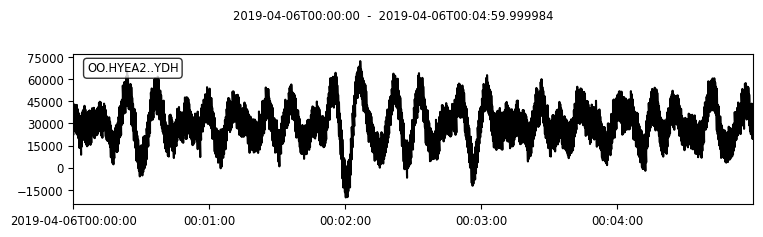

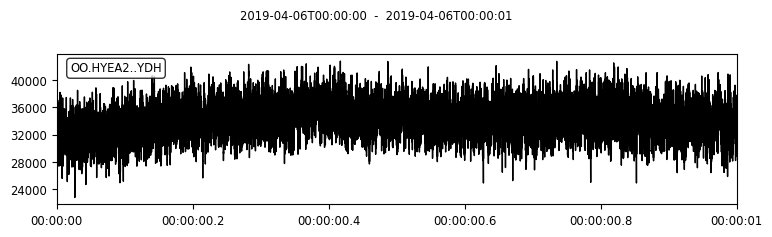

(0.0, 15000.0)

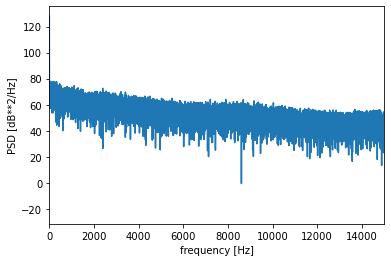

In [57]:
st2[0].plot()

# slicing time
t_start2 = st2[0].stats.starttime 
t_end2 = st2[0].stats.starttime + 1
sliced2 = st2.slice(t_start2, t_end2)
sliced2.plot()

from scipy.fftpack import fft
x2 = (sliced2[0].data)*np.hanning(len(sliced2[0].data))
xfft2 = 2*np.square(fft(x2,64000))/(len(x2)*fs2)
fre2 = np.linspace(1,fs2,64000)
data_db2 = 10*np.log10(np.abs(xfft2))+169-128.9
plt.plot(fre2[0:32000], data_db2[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)



4000


(0.0, 5000.0)

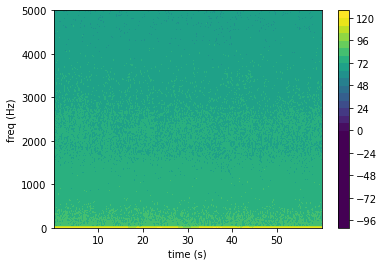

In [59]:
# Plot Spectrogram 
t_start2 = st2[0].stats.starttime 
t_end2 = st2[0].stats.starttime + 60
sliced2 = st2.slice(t_start2, t_end2)

npts2 = len(sliced2[0])
end2 = npts2 / fs2
nfft2 = int(fs2/16)  # number of fft points of each bin
print(nfft2)
per_lap2 = 0.90      # percentage of overlap
nlap2 = int(nfft2 * float(per_lap2))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram2, freq2, time2 = mlab.specgram(sliced2[0].data,NFFT = nfft2,Fs = fs2,noverlap = nlap2, pad_to = None)
specgram2 = 10 * np.log10(specgram2) +169-128.9
plt.contourf(time2,freq2,specgram2,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### 1.3 Rainy & No Wind (Oregon Shelf)

In [60]:
#yyyy/mm/dd 2019/03/06
data_url_3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/06/OO-HYEA2--YDH-2019-03-06T00:00:00.000000.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st3 = read(data_url_3)
st3[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-03-06T00:00:00.000000Z
         endtime: 2019-03-06T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9411, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38547456})

In [62]:
fs3 = st3[0].stats.sampling_rate
print(fs3)

64000.0


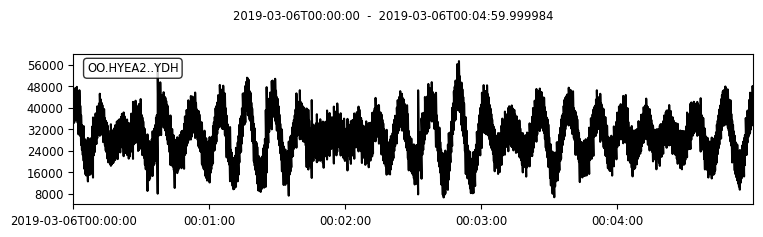

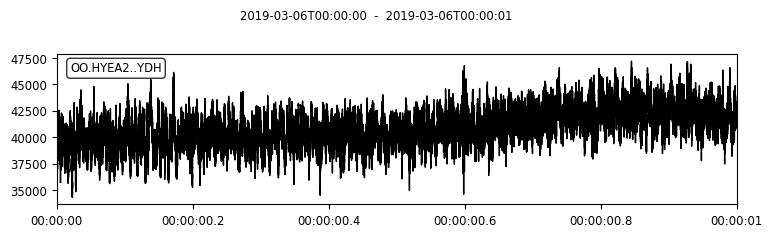

(0.0, 15000.0)

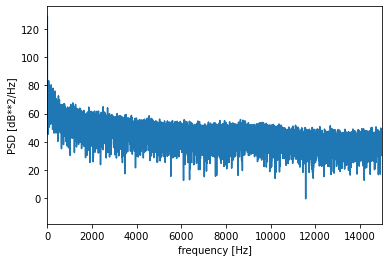

In [63]:
st3[0].plot() #all 5 mins

# slicing time
t_start3 = st3[0].stats.starttime 
t_end3 = st3[0].stats.starttime + 1
sliced3 = st3.slice(t_start3, t_end3)
sliced3.plot()

from scipy.fftpack import fft
x3 = (sliced3[0].data)*np.hanning(len(sliced3[0].data))
xfft3 = 2*np.square(fft(x3,64000))/(len(x3)*fs3)
fre3 = np.linspace(1,fs3,64000)
data_db3 = 10*np.log10(np.abs(xfft3))+169-128.9
plt.plot(fre3[0:32000], data_db3[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

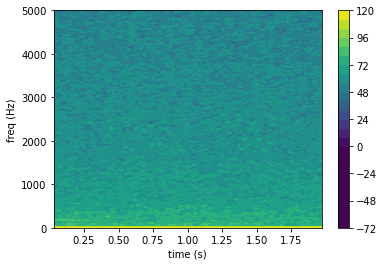

In [64]:
# Plot Spectrogram 
t_start3 = st3[0].stats.starttime 
t_end3 = st3[0].stats.starttime + 2
sliced3 = st3.slice(t_start3, t_end3)

npts3 = len(sliced3[0])
end3 = npts3 / fs3
nfft3 = int(fs3/16)  # number of fft points of each bin
print(nfft3)
per_lap3 = 0.90      # percentage of overlap
nlap3 = int(nfft3 * float(per_lap3))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram3, freq3, time3 = mlab.specgram(sliced3[0].data,NFFT = nfft3,Fs = fs3,noverlap = nlap3, pad_to = None)
specgram3 = 10 * np.log10(specgram3) +169-128.9
plt.contourf(time3,freq3,specgram3,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### 1.4 Rainy & Windy (Oregon Shelf)

In [65]:
#yyyy/mm/dd 2019/03/01
data_url_4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/01/OO-HYEA2--YDH-2019-03-01T00:00:00.000000.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st4 = read(data_url_4)
st4[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-03-01T00:00:00.000000Z
         endtime: 2019-03-01T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 10107, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 41398272})

In [66]:
fs4 = st4[0].stats.sampling_rate
print(fs4)

64000.0


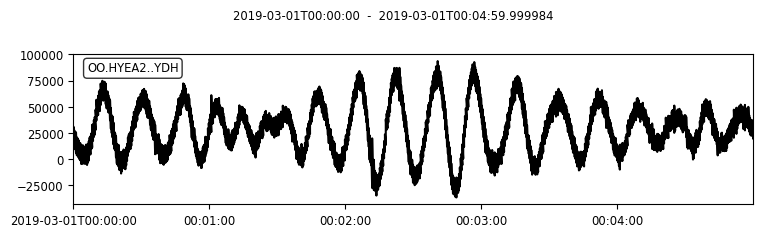

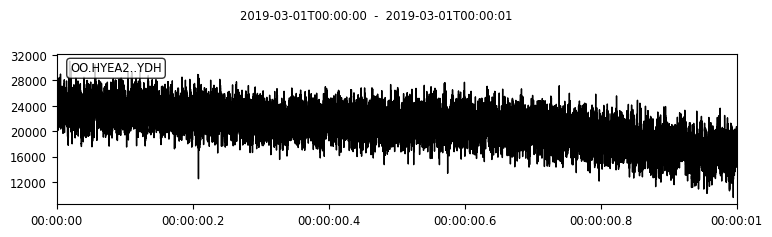

(0.0, 15000.0)

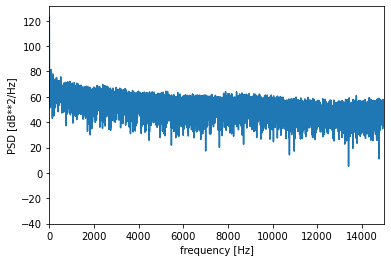

In [68]:
st4[0].plot()

# slicing time
t_start4 = st4[0].stats.starttime 
t_end4 = st4[0].stats.starttime + 1
sliced4 = st4.slice(t_start4, t_end4)
sliced4.plot()

from scipy.fftpack import fft
x4 = (sliced4[0].data)*np.hanning(len(sliced4[0].data))
xfft4 = 2*np.square(fft(x4,64000))/(len(x4)*fs4)
fre4 = np.linspace(1,fs4,64000)
data_db4 = 10*np.log10(np.abs(xfft4))+169-128.9
plt.plot(fre4[0:32000], data_db4[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

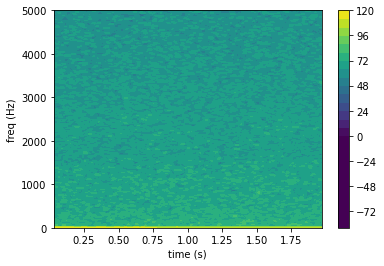

In [69]:
t_start4 = st4[0].stats.starttime 
t_end4 = st4[0].stats.starttime + 2
sliced4 = st4.slice(t_start4, t_end4)

npts4 = len(sliced4[0])
end4 = npts4 / fs4
nfft4 = int(fs4/16)  # number of fft points of each bin
print(nfft4)
per_lap4 = 0.90      # percentage of overlap
nlap4 = int(nfft4 * float(per_lap4))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram4, freq4, time4 = mlab.specgram(sliced4[0].data,NFFT = nfft4,Fs = fs4,noverlap = nlap4, pad_to = None)
specgram4 = 10 * np.log10(specgram4) +169-128.9
plt.contourf(time4,freq4,specgram4,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Oregon Offshore

### 2.1 No Rain & No Wind (Oregon Offshore)

In [70]:
#yyyy/mm/dd 2018/11/16
data_url_5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/11/16/OO-HYEA1--YDH-2018-11-16T13:10:00.000015.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st5 = read(data_url_5)
st5[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2018-11-16T13:10:00.000015Z
         endtime: 2018-11-16T13:14:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9345, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38277120})

In [71]:
fs5 = st5[0].stats.sampling_rate
print(fs5)

64000.0


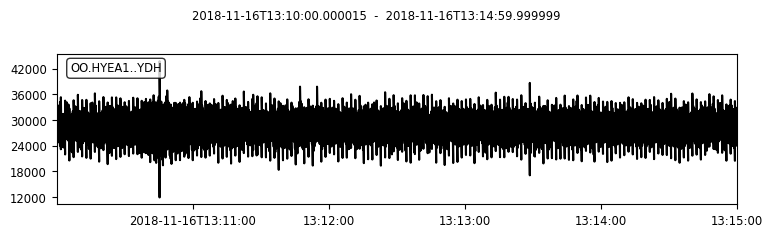

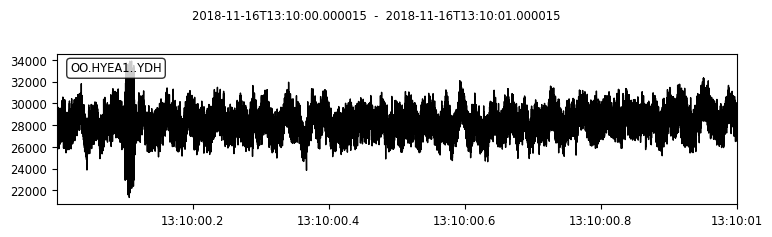

(0.0, 15000.0)

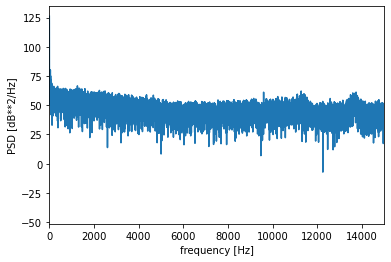

In [73]:
st5[0].plot()

# slicing time
t_start5 = st5[0].stats.starttime 
t_end5 = st5[0].stats.starttime + 1
sliced5 = st5.slice(t_start5, t_end5)
sliced5.plot()

from scipy.fftpack import fft
x5 = (sliced5[0].data)*np.hanning(len(sliced5[0].data))
xfft5 = 2*np.square(fft(x5,64000))/(len(x5)*fs5)
fre5 = np.linspace(1,fs5,64000)
data_db5 = 10*np.log10(np.abs(xfft5))+169-128.9
plt.plot(fre5[0:32000], data_db5[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

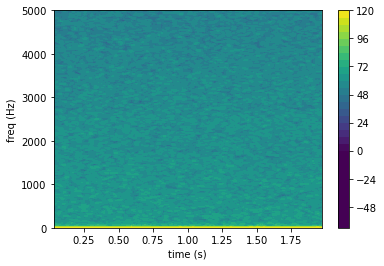

In [74]:
t_start5 = st5[0].stats.starttime 
t_end5 = st5[0].stats.starttime + 2
sliced5 = st5.slice(t_start5, t_end5)

npts5 = len(sliced5[0])
end5 = npts5 / fs5
nfft5 = int(fs5/16)  # number of fft points of each bin
print(nfft5)
per_lap5 = 0.90      # percentage of overlap
nlap5 = int(nfft5 * float(per_lap5))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram5, freq5, time5 = mlab.specgram(sliced5[0].data,NFFT = nfft5,Fs = fs5,noverlap = nlap5, pad_to = None)
specgram5= 10 * np.log10(specgram5) +169-128.9
plt.contourf(time5,freq5,specgram5,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### 2.2 Windy & No Rain (Oregon Offshore)

In [75]:
#yyyy/mm/dd 2019/02/27
data_url_6 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/27/OO-HYEA1--YDH-2019-02-27T00:00:00.000000.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st6 = read(data_url_6)
st6[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2019-02-27T00:00:00.000000Z
         endtime: 2019-02-27T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9479, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38825984})

In [76]:
fs6 = st6[0].stats.sampling_rate
print(fs6)

64000.0


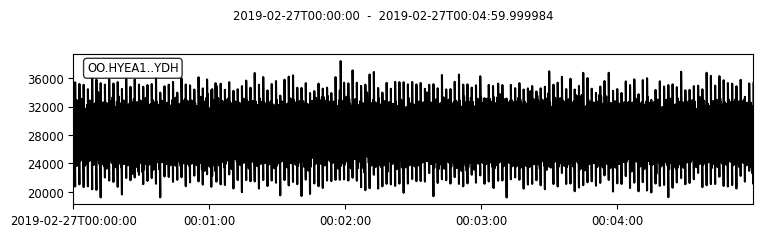

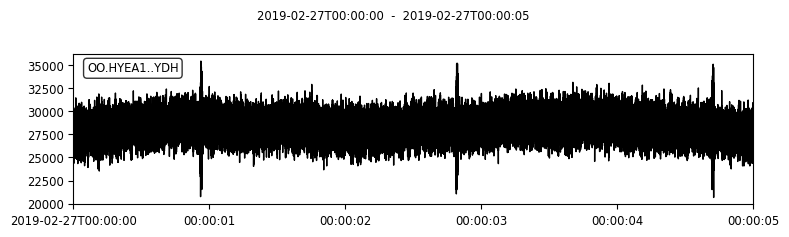

(0.0, 15000.0)

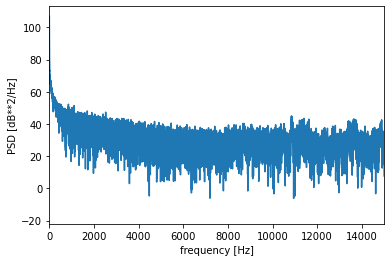

In [77]:
st6[0].plot()

# slicing time
t_start6 = st6[0].stats.starttime 
t_end6 = st6[0].stats.starttime + 5
sliced6 = st6.slice(t_start6, t_end6)
sliced6.plot()

from scipy.fftpack import fft
x6 = (sliced6[0].data)*np.hanning(len(sliced6[0].data))
xfft6 = 2*np.square(fft(x6,64000))/(len(x6)*fs6)
fre6 = np.linspace(1,fs6,64000)
data_db6 = 10*np.log10(np.abs(xfft6))+169-128.9
plt.plot(fre6[0:32000], data_db6[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

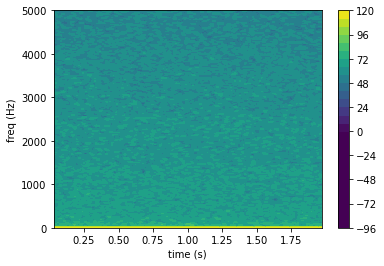

In [78]:
t_start6 = st6[0].stats.starttime 
t_end6 = st6[0].stats.starttime + 2
sliced6 = st6.slice(t_start6, t_end6)

npts6 = len(sliced6[0])
end6 = npts6 / fs6
nfft6 = int(fs6/16)  # number of fft points of each bin
print(nfft6)
per_lap6 = 0.90      # percentage of overlap
nlap6 = int(nfft6 * float(per_lap6))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram6, freq6, time6 = mlab.specgram(sliced6[0].data,NFFT = nfft6,Fs = fs6,noverlap = nlap6, pad_to = None)
specgram6 = 10 * np.log10(specgram6) +169-128.9
plt.contourf(time6,freq6,specgram6,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### 2.3 Rainy & No Wind (Oregon Offshore)

In [79]:
#yyyy/mm/dd 2018/09/01
data_url_7 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/09/01/OO-HYEA1--YDH-2018-09-01T00:00:00.000015.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st7 = read(data_url_7)
st7[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2018-09-01T00:00:00.000015Z
         endtime: 2018-09-01T00:04:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 8502, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 34824192})

In [80]:
fs7 = st7[0].stats.sampling_rate
print(fs7)

64000.0


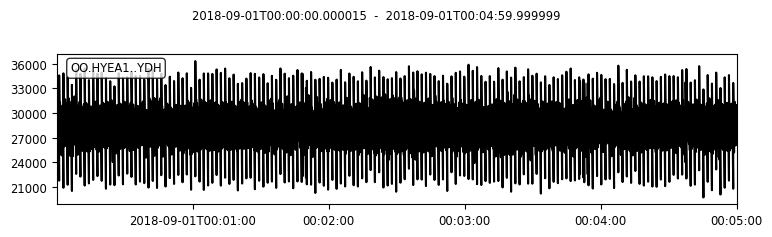

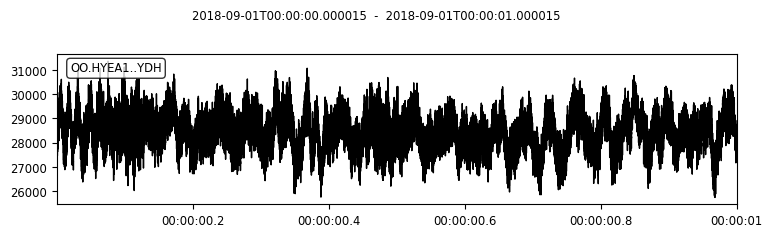

(0.0, 15000.0)

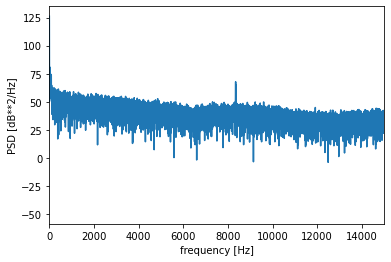

In [81]:
st7[0].plot()

# slicing time
t_start7 = st7[0].stats.starttime 
t_end7 = st7[0].stats.starttime + 1
sliced7 = st7.slice(t_start7, t_end7)
sliced7.plot()

from scipy.fftpack import fft
x7 = (sliced7[0].data)*np.hanning(len(sliced7[0].data))
xfft7 = 2*np.square(fft(x7,64000))/(len(x7)*fs7)
fre7 = np.linspace(1,fs7,64000)
data_db7 = 10*np.log10(np.abs(xfft7))+169-128.9
plt.plot(fre7[0:32000], data_db7[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

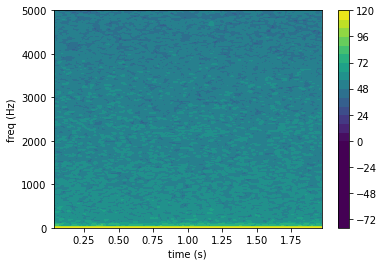

In [82]:
t_start7 = st7[0].stats.starttime 
t_end7 = st7[0].stats.starttime + 2
sliced7 = st7.slice(t_start7, t_end7)

npts7 = len(sliced7[0])
end7 = npts7 / fs7
nfft7 = int(fs7/16)  # number of fft points of each bin
print(nfft7)
per_lap7 = 0.90      # percentage of overlap
nlap7 = int(nfft7 * float(per_lap7))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram7, freq7, time7 = mlab.specgram(sliced7[0].data,NFFT = nfft7,Fs = fs7,noverlap = nlap7, pad_to = None)
specgram7 = 10 * np.log10(specgram7) +169-128.9
plt.contourf(time7,freq7,specgram7,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### 2.4 Rainy & Windy (Oregon Offshore)

In [83]:
#yyyy/mm/dd 2019/02/10
data_url_8 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/10/OO-HYEA1--YDH-2019-02-10T00:00:00.000000.mseed'
#localFileName = '../data/merged_hydrophone.mseed'

st8 = read(data_url_8)
st8[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2019-02-10T00:00:00.000000Z
         endtime: 2019-02-10T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9415, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38563840})

In [84]:
fs8 = st8[0].stats.sampling_rate
print(fs8)

64000.0


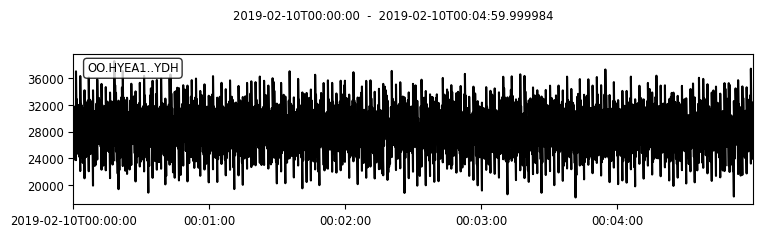

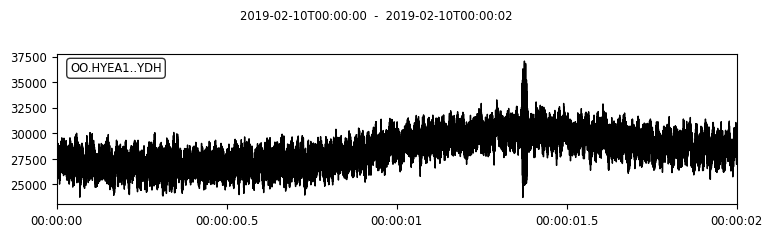

(0.0, 15000.0)

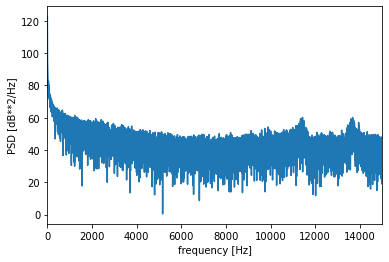

In [85]:
st8[0].plot()

# slicing time
t_start8 = st8[0].stats.starttime 
t_end8 = st8[0].stats.starttime + 2
sliced8 = st8.slice(t_start8, t_end8)
sliced8.plot()

from scipy.fftpack import fft
x8 = (sliced8[0].data)*np.hanning(len(sliced8[0].data))
xfft8 = 2*np.square(fft(x8,64000))/(len(x8)*fs8)
fre8 = np.linspace(1,fs8,64000)
data_db8 = 10*np.log10(np.abs(xfft8))+169-128.9
plt.plot(fre8[0:32000], data_db8[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

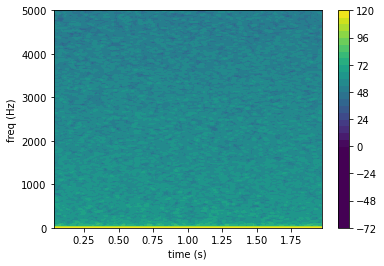

In [86]:
t_start8 = st8[0].stats.starttime 
t_end8 = st8[0].stats.starttime + 2
sliced8 = st8.slice(t_start8, t_end8)

npts8 = len(sliced8[0])
end8 = npts8 / fs8
nfft8 = int(fs8/16)  # number of fft points of each bin
print(nfft8)
per_lap8 = 0.90      # percentage of overlap
nlap8 = int(nfft8 * float(per_lap8))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram8, freq8, time8 = mlab.specgram(sliced8[0].data,NFFT = nfft8,Fs = fs8,noverlap = nlap8, pad_to = None)
specgram8 = 10 * np.log10(specgram8) +169-128.9
plt.contourf(time8,freq8,specgram8,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

====================================================================================

In [424]:
data_url_2 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:05:00.000000.mseed'
st = read(data_url_2) 

In [425]:
st += st1_1[0]
st.merge(fill_value ='interpolate',method=1)

1 Trace(s) in Stream:
OO.HYVM1..YDH | 2017-10-06T20:05:00.000000Z - 2017-10-06T20:09:59.998000Z | 64000.0 Hz, 19199873 samples

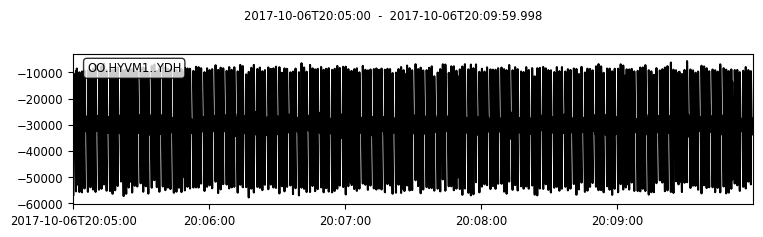

In [426]:
st[0].plot()

(0.0, 15000.0)

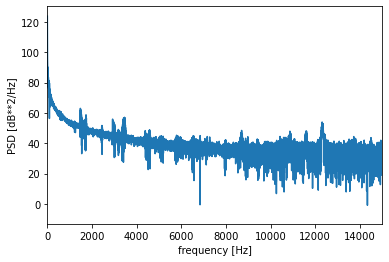

In [427]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

4000


(0.0, 5000.0)

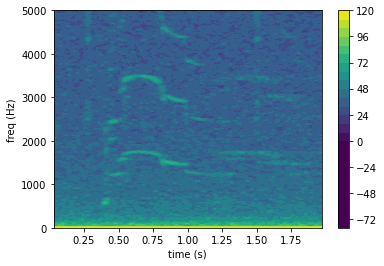

In [428]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)



### ========================================================================================

# Part 2) Airgun, Marine Mammals, Earthquakes/Volcano Noise

## Airgun

In [108]:
#(node_name='Axial Base Seafloor',year='/2019',month='/08',day='/01')

data_url_9='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'
st9 = read(data_url_9)
st9[0].stats

         network: OO
         station: AXVM1
        location: 
         channel: YDH
       starttime: 2019-08-01T00:00:00.000015Z
         endtime: 2019-08-01T00:04:59.998999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199936
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6919, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 28340224})

In [109]:
fs9 = st9[0].stats.sampling_rate
print(fs9)

64000.0


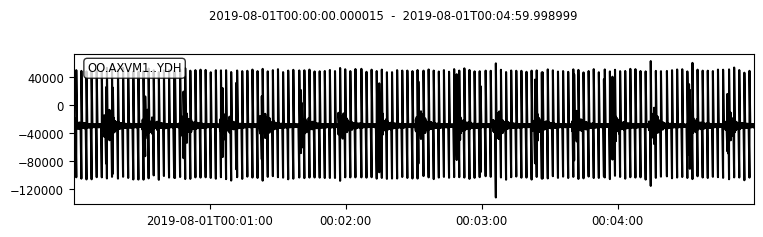

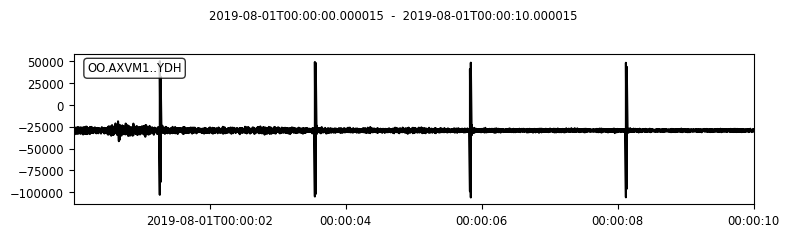

In [124]:
# the entire 5 mins
st9[0].plot()

# slice time
t_start9 = st9[0].stats.starttime 
t_end9 = st9[0].stats.starttime + 10
sliced9 = st9.slice(t_start9, t_end9)
sliced9.plot()


4000


(0.0, 5000.0)

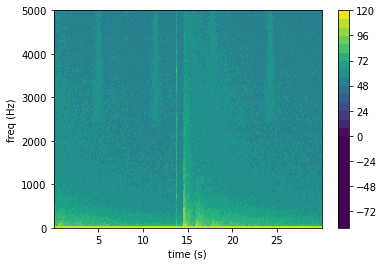

In [127]:
t_start9 = st9[0].stats.starttime 
t_end9 = st9[0].stats.starttime + 30
sliced9 = st9.slice(t_start9, t_end9)

npts9 = len(sliced9[0])
end9 = npts9 / fs9
nfft9 = int(fs9/16)  # number of fft points of each bin
print(nfft9)
per_lap9 = 0.90      # percentage of overlap
nlap9 = int(nfft9 * float(per_lap9))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram9, freq9, time9 = mlab.specgram(sliced9[0].data,NFFT = nfft9,Fs = fs9,noverlap = nlap9, pad_to = None)
specgram9 = 10 * np.log10(specgram9) +169-128.9
plt.contourf(time9,freq9,specgram9,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Marine Mammals

In [88]:
#(node_name='Oregon Slope Base Seafloor',year='/2017',month='/10',day='/06')

#data_url_10='https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
data_url_10='https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:05:00.000000.mseed'
st10 = read(data_url_10)
st10[0].stats

         network: OO
         station: HYVM1
        location: 
         channel: YDH
       starttime: 2017-10-06T20:05:00.000000Z
         endtime: 2017-10-06T20:09:59.998000Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199873
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6421, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 26300416})

In [89]:
fs10 = st10[0].stats.sampling_rate
print(fs10)

64000.0


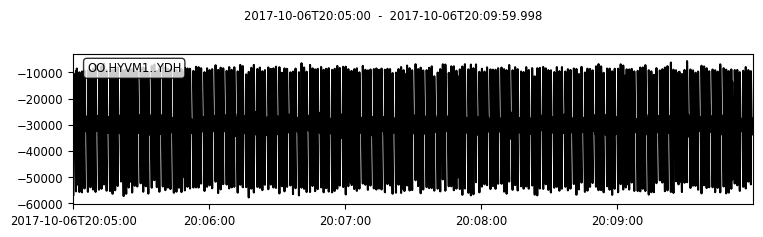

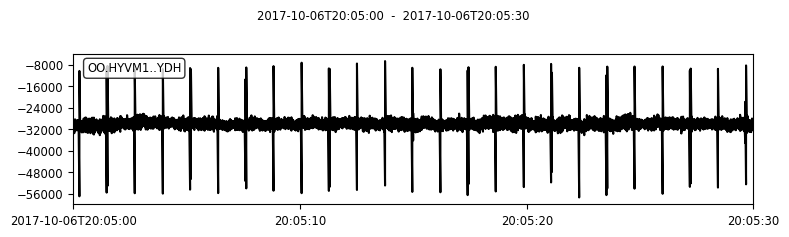

In [128]:
# the entire 5 mins
st10[0].plot()

# slice time
t_start10 = st10[0].stats.starttime 
t_end10 = st10[0].stats.starttime + 30
sliced10 = st10.slice(t_start10, t_end10)
sliced10.plot()


4000


(0.0, 5000.0)

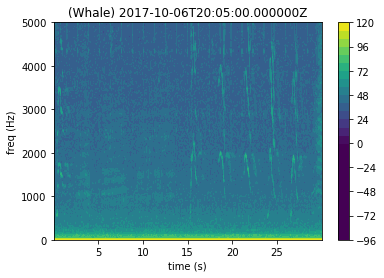

In [129]:

# slice time
t_start10 = st10[0].stats.starttime 
t_end10 = st10[0].stats.starttime + 30
sliced10 = st10.slice(t_start10, t_end10)


npts10 = len(sliced10[0])
end10 = npts10 / fs10
nfft10 = int(fs10/16)  # number of fft points of each bin
print(nfft10)
per_lap10 = 0.90      # percentage of overlap
nlap10 = int(nfft10 * float(per_lap10))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram10, freq10, time10 = mlab.specgram(sliced10[0].data,NFFT = nfft10,Fs = fs10,noverlap = nlap10, pad_to = None)
specgram10 = 10 * np.log10(specgram10) +169-128.9
plt.contourf(time10,freq10,specgram10,30,vmin=0, vmax=120)
plt.title('(Whale) 2017-10-06T20:05:00.000000Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

## Earthquake/Volcano

In [2]:
#(node_name='Axial Seamount',year='/2020',month='/03',day='/03')
# link  http://axial.ocean.washington.edu/

data_url_11='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2020/03/03/OO-AXVM1--YDH-2020-03-03T00:00:00.000000.mseed'
st11 = read(data_url_11)
st11[0].stats

         network: OO
         station: AXVM1
        location: 
         channel: YDH
       starttime: 2020-03-03T00:00:00.000000Z
         endtime: 2020-03-03T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 7348, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 30097408})

In [3]:
fs11 = st11[0].stats.sampling_rate
print(fs11)

64000.0


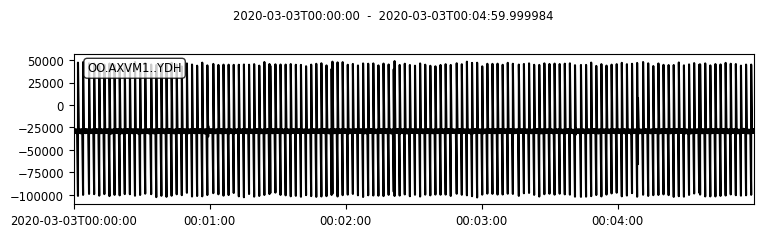

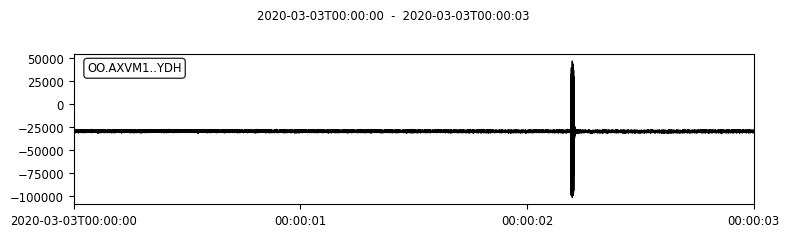

In [6]:
# the entire 5 mins
st11[0].plot()

# slice time
t_start11 = st11[0].stats.starttime 
t_end11 = st11[0].stats.starttime + 3
sliced11 = st11.slice(t_start11, t_end11)
sliced11.plot()


4000


(0.0, 5000.0)

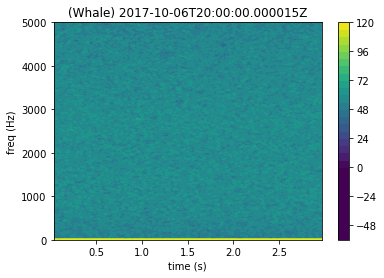

In [5]:
# slice time
t_start11 = st11[0].stats.starttime 
t_end11 = st11[0].stats.starttime + 3
sliced11 = st11.slice(t_start11, t_end11)

npts11 = len(sliced11[0])
end11 = npts11 / fs11
nfft11 = int(fs11/16)  # number of fft points of each bin
print(nfft11)
per_lap11 = 0.90      # percentage of overlap
nlap11 = int(nfft11 * float(per_lap11))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram11, freq11, time11 = mlab.specgram(sliced11[0].data,NFFT = nfft11,Fs = fs11,noverlap = nlap11, pad_to = None)
specgram11 = 10 * np.log10(specgram11) +169-128.9
plt.contourf(time11,freq11,specgram11,30,vmin=0, vmax=120)
plt.title('(Whale) 2017-10-06T20:00:00.000015Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)